In [42]:
from sklearn.datasets import make_regression
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

plt.style.use('ggplot')

In [ ]:
from sklearn.datasets import make_regression
import numpy as np
import seaborn as sns

X, Y = make_regression(n_samples=500, n_features=2, n_informative=2, noise=10, effective_rank=1)

In [31]:
X, Y = make_regression(n_samples=500, n_features=2, n_informative=2, noise=10, effective_rank=1)

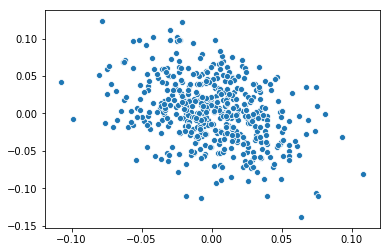

In [33]:
sns.scatterplot(X.T[0], X.T[1]);

In [34]:
X.shape

(500, 2)

In [36]:
np.mean(X, axis=0)

array([-0.00020747,  0.00255629])

In [38]:
X -= np.mean(X, axis=0)

In [84]:
C = np.dot(X.T, X) / 499

In [85]:
C.shape

(2, 2)

In [86]:
lambd, eig = np.linalg.eig(C)

In [87]:
eig.shape

(2, 2)

In [89]:
lambd

array([0.00081074, 0.0019982 ])

In [93]:
eig[:, 0], eig[:, 1] = eig[:, 1], eig[:, 0].copy()

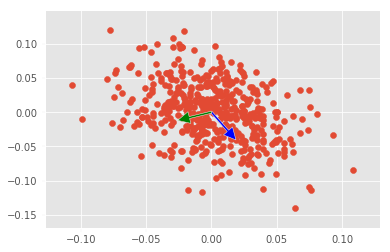

In [104]:
mu = X.mean(axis=0)
projected_data = np.dot(X, eig)
sigma = projected_data.std(axis=0)
fig, ax = plt.subplots()
ax.scatter(X.T[0], X.T[1])

colors = ['blue', 'green']
for i, axis in enumerate(eig):
    start, end = mu, mu + sigma[i] * axis
    ax.annotate('', xy=end, xytext=start,
        arrowprops=dict(facecolor=colors[i], width=2.0))
ax.tick_params(axis='both', width=0.05)

In [97]:
eig

array([[ 0.42065518, -0.9072206 ],
       [-0.9072206 , -0.42065518]])

In [106]:
# Projecting data
proj = np.dot(X, eig[:,0])

In [110]:
proj

array([ 1.39683143e-02, -2.76399062e-02,  4.23475035e-02,  1.66136148e-02,
        4.75597690e-02,  5.62200754e-02, -5.60639013e-02,  6.08187784e-02,
       -1.08002785e-01, -3.51967720e-02, -2.69546467e-02, -4.32860731e-02,
        6.34954211e-02, -9.91580679e-03,  2.35768736e-03, -3.73292820e-02,
       -3.18611297e-02, -2.35599315e-02, -3.28736284e-02,  2.14376993e-02,
       -1.08539599e-01, -4.02700646e-02,  4.13306610e-02,  7.72283605e-02,
       -5.74651011e-02, -1.94325739e-02, -2.06522520e-02, -4.81545528e-02,
        1.90411517e-02, -3.41590459e-02, -3.51341418e-02,  8.01284584e-02,
        3.84499654e-02, -3.14454531e-02,  2.19326991e-02, -2.10734544e-02,
       -1.01248457e-01, -4.65877591e-02, -3.69925160e-02, -6.78237205e-04,
       -2.09849124e-03,  3.05463402e-02,  7.05690359e-02, -1.42009040e-01,
        8.02645666e-02, -2.08943422e-02, -4.61479579e-02, -8.50641182e-03,
       -2.16480966e-02, -4.92500912e-02,  6.63161780e-02, -4.92748594e-03,
        6.19392029e-02,  

## Use built-in PCA

In [68]:
from sklearn.decomposition import PCA

In [69]:
pca = PCA(n_components=2)

In [99]:
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [100]:
pca.components_

array([[ 0.42065518, -0.9072206 ],
       [-0.9072206 , -0.42065518]])

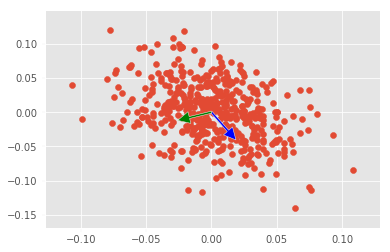

In [101]:
mu = X.mean(axis=0)
projected_data = np.dot(X, pca.components_)
sigma = projected_data.std(axis=0)
fig, ax = plt.subplots()
ax.scatter(X.T[0], X.T[1])

colors = ['blue', 'green']
for i, axis in enumerate(eig):
    start, end = mu, mu + sigma[i] * axis
    ax.annotate('', xy=end, xytext=start,
        arrowprops=dict(facecolor=colors[i], width=2.0))
ax.tick_params(axis='both', width=0.05)

In [107]:
pca = PCA(n_components=1)
pca.fit(X)
act = pca.transform(X)

In [113]:
act.squeeze()

array([ 1.39683143e-02, -2.76399062e-02,  4.23475035e-02,  1.66136148e-02,
        4.75597690e-02,  5.62200754e-02, -5.60639013e-02,  6.08187784e-02,
       -1.08002785e-01, -3.51967720e-02, -2.69546467e-02, -4.32860731e-02,
        6.34954211e-02, -9.91580679e-03,  2.35768736e-03, -3.73292820e-02,
       -3.18611297e-02, -2.35599315e-02, -3.28736284e-02,  2.14376993e-02,
       -1.08539599e-01, -4.02700646e-02,  4.13306610e-02,  7.72283605e-02,
       -5.74651011e-02, -1.94325739e-02, -2.06522520e-02, -4.81545528e-02,
        1.90411517e-02, -3.41590459e-02, -3.51341418e-02,  8.01284584e-02,
        3.84499654e-02, -3.14454531e-02,  2.19326991e-02, -2.10734544e-02,
       -1.01248457e-01, -4.65877591e-02, -3.69925160e-02, -6.78237205e-04,
       -2.09849124e-03,  3.05463402e-02,  7.05690359e-02, -1.42009040e-01,
        8.02645666e-02, -2.08943422e-02, -4.61479579e-02, -8.50641182e-03,
       -2.16480966e-02, -4.92500912e-02,  6.63161780e-02, -4.92748594e-03,
        6.19392029e-02,  

In [120]:
from sklearn.metrics import r2_score

In [121]:
r2_score(proj, act)

1.0